In [1]:
#Main imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quandl
import pyflux as pf

In [2]:
# Grabs the Zillow Seattle Median Price per square foot of houses sold in USA  Quandl

In [16]:
seattledata= quandl.get("ZILLOW/Z98136_MSPFAH")

In [17]:
seattledata.head()

,Value
Date,
1996-04-30,101.9273
1996-05-31,100.1644
1996-06-30,101.9912
1996-07-31,98.5087
1996-08-31,99.9461


In [18]:
seattledata=seattledata.reset_index()

In [19]:
seattledata.tail()

,Date,Value
250,2017-02-28,411.0
251,2017-03-31,416.0
252,2017-04-30,425.0
253,2017-05-31,434.0
254,2017-06-30,441.0


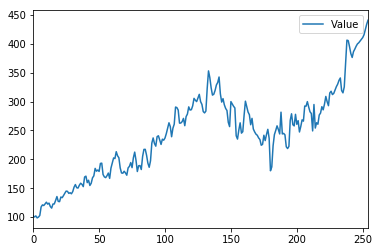

In [20]:
#Plotting the data
seattledata.plot()

In [21]:
timeseries = seattledata['Value']

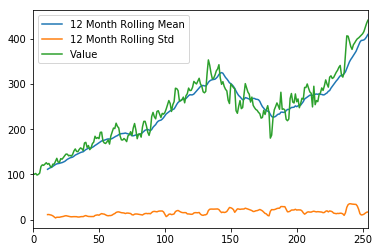

In [22]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()


In [28]:
seattledata = seattledata.rename(columns={'Date': 'ds',
                        'Value': 'y'})

seattledata.head(5)

,ds,y
0,1996-04-30,101.9273
1,1996-05-31,100.1644
2,1996-06-30,101.9912
3,1996-07-31,98.5087
4,1996-08-31,99.9461


In [29]:
from fbprophet import Prophet

In [30]:
my_model = Prophet(interval_width=0.95)

In [31]:
my_model.fit(seattledata)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
286,2020-02-01
287,2020-03-01
288,2020-04-01
289,2020-05-01
290,2020-06-01


In [37]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
286,2020-02-01,494.192618,451.813208,540.904669
287,2020-03-01,518.335535,475.159452,568.426628
288,2020-04-01,523.410090,481.641391,572.079352
289,2020-05-01,522.798599,477.029142,571.140962
290,2020-06-01,506.183678,457.582742,554.977248


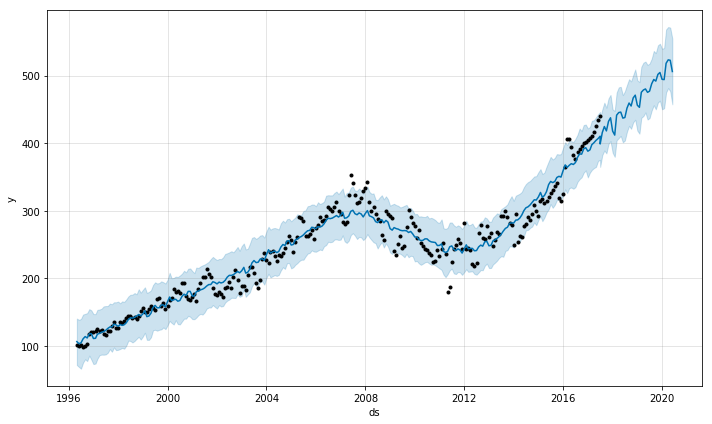

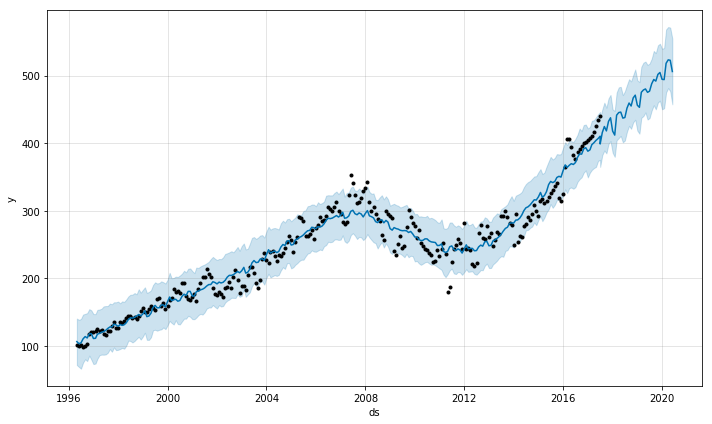

In [38]:
my_model.plot(forecast,
              uncertainty=True)

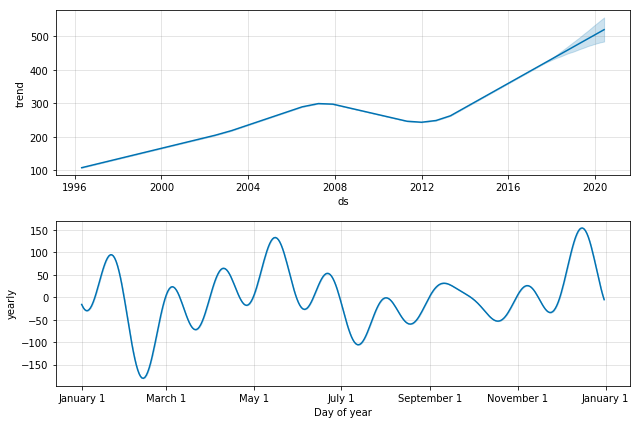

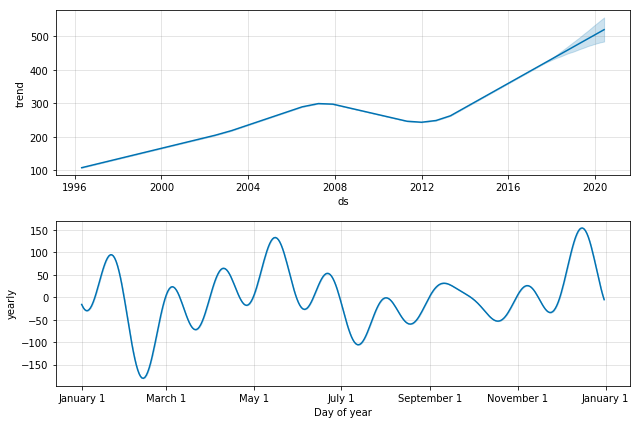

In [35]:
my_model.plot_components(forecast)

In [39]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
286,2020-02-01,507.479137,479.377067,537.799456,451.813208,540.904669,-13.286519,-13.286519,-13.286519,-13.286519,-13.286519,-13.286519,-13.286519,-13.286519,-13.286519,494.192618
287,2020-03-01,510.356574,480.759852,541.635613,475.159452,568.426628,7.978961,7.978961,7.978961,7.978961,7.978961,7.978961,7.978961,7.978961,7.978961,518.335535
288,2020-04-01,513.432455,482.631956,545.592660,481.641391,572.079352,9.977635,9.977635,9.977635,9.977635,9.977635,9.977635,9.977635,9.977635,9.977635,523.410090
289,2020-05-01,516.409114,484.530977,550.224787,477.029142,571.140962,6.389485,6.389485,6.389485,6.389485,6.389485,6.389485,6.389485,6.389485,6.389485,522.798599
290,2020-06-01,519.484995,486.199904,555.052798,457.582742,554.977248,-13.301317,-13.301317,-13.301317,-13.301317,-13.301317,-13.301317,-13.301317,-13.301317,-13.301317,506.183678
